In [1]:
import numpy
import pandas

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [3]:
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets

In [6]:
import io

In [7]:
from PIL import Image

In [8]:
import tqdm
from sklearn.model_selection import train_test_split
import cv2

In [9]:
from sklearn.utils import shuffle 

Train, test and split

In [10]:
X_train = []
Y_train = []

image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitarios_tumor']

In [11]:
import os

In [12]:
import numpy as np

In [13]:
for i in labels:
    folderPath = os.path.join('../Tesis/data/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('../Tesis/data/Testing/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

Train test split

In [15]:
X_train,X_test,y_train, y_test = train_test_split(X_train,Y_train,test_size=0.1, random_state=101)

In [16]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Redes Neuronales Convuncionales (CNN)

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax')) #4 categories


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])



In [21]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


83/83 [==============================] - 218s 3s/step - loss: 1.9979 - accuracy: 0.2849 - val_loss: 1.3420 - val_accuracy: 0.4184
Epoch 2/20
83/83 [==============================] - 222s 3s/step - loss: 1.2513 - accuracy: 0.4347 - val_loss: 1.0741 - val_accuracy: 0.5374
Epoch 3/20
83/83 [==============================] - 219s 3s/step - loss: 1.0632 - accuracy: 0.5369 - val_loss: 1.0460 - val_accuracy: 0.5612
Epoch 4/20
83/83 [==============================] - 219s 3s/step - loss: 0.9417 - accuracy: 0.5830 - val_loss: 0.8120 - val_accuracy: 0.6531
Epoch 5/20
83/83 [==============================] - 219s 3s/step - loss: 0.7894 - accuracy: 0.6686 - val_loss: 0.8348 - val_accuracy: 0.6259
Epoch 6/20
83/83 [==============================] - 212s 3s/step - loss: 0.7449 - accuracy: 0.6810 - val_loss: 0.8457 - val_accuracy: 0.6156
Epoch 7/20
83/83 [==============================] - 220s 3s/step - loss: 0.6570 - accuracy: 0.7227 - val_loss: 0.6775 - val_accuracy: 0.7517
Epoch 8/20


In [22]:
model.save('tumorcerebral.h5')

c:\Users\danie\Desktop\Tesis\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Gráfico

In [24]:
# Importación de paquetes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

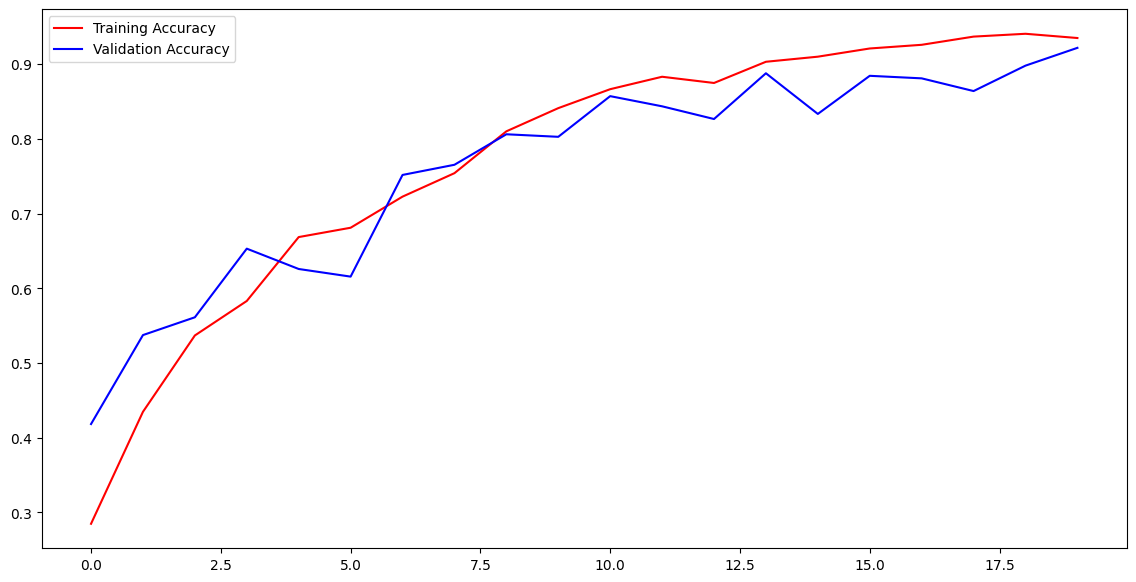

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc,'b',label ="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

Podemos ver que el accuracy ha ido aumentado

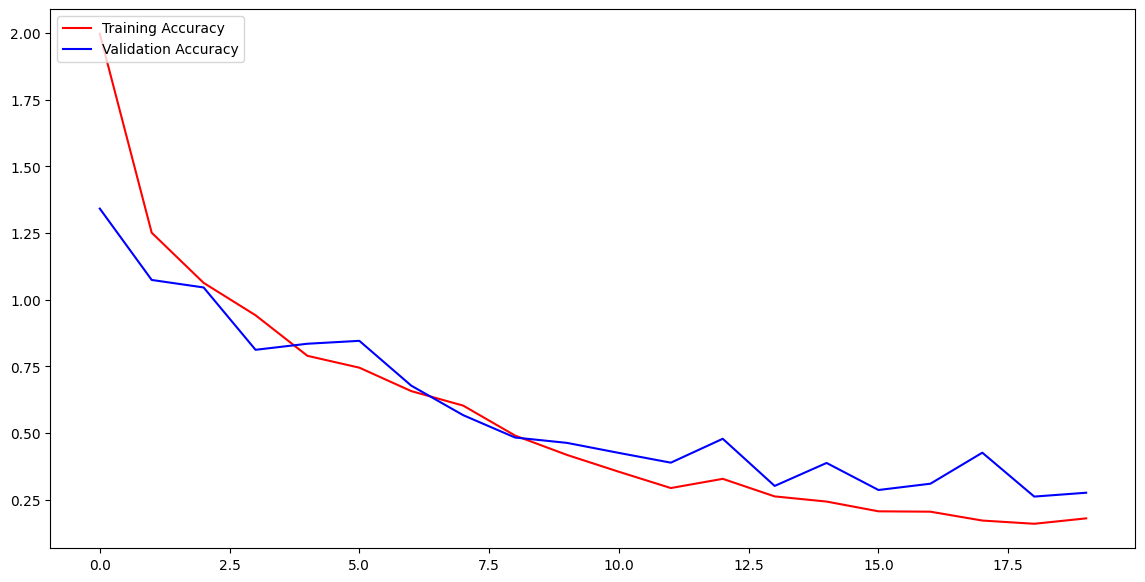

In [27]:
loss = history.history['loss']
val_los = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Accuracy")
plt.plot(epochs, val_los,'b',label ="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

Por otro lado el loss ha ido disminuyendo. Esto quiere decir que nuestro modelo esta funcionando correctamente

# Predicción

In [29]:
img = cv2.imread('../Tesis/data/Training/pituitarios_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [30]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

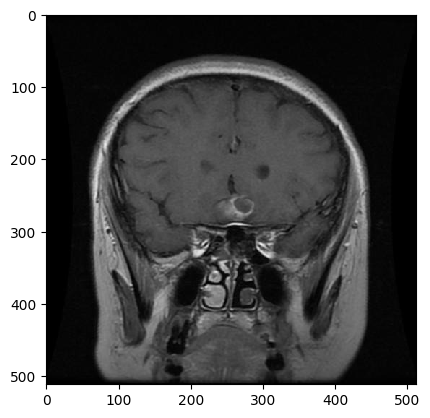

In [31]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../Tesis/data/Training/pituitarios_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


In [32]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 233ms/step


3